In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

In [59]:
# Reading Diabetes Dataset

df_diabetes = pd.read_csv('Diabetes_Data_1999_2008.csv')

# Data Cleaning and Pre Processing

## Duplicates and Unique Values

In [60]:
print(f"We have {df_diabetes.patient_nbr.nunique()} unique patients out of {len(df_diabetes)} records")

We have 71518 unique patients out of 101766 records


In [61]:
# We remove duplicate patients in order to get i.i.d observations for modelling later on

df_diabetes = df_diabetes.drop_duplicates(subset ='patient_nbr', keep ='first').copy()

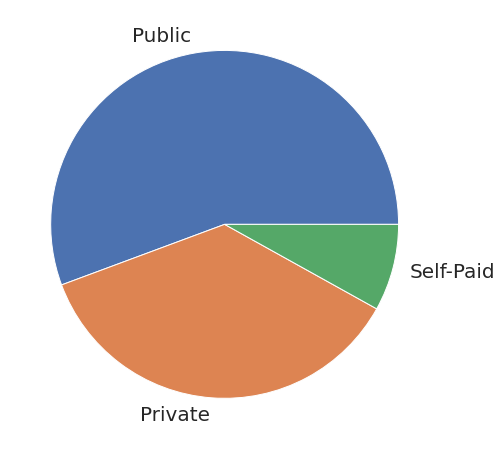

In [454]:
# Creating a cleaner, better insurance type column
sns.set_theme()
df_diabetes['payer_code'].replace('?',np.nan, inplace=True)
df_diabetes.dropna(subset=['payer_code'], inplace=True)
df_diabetes['insurance_type'] = df_diabetes['payer_code'].dropna().apply(lambda x : 'Public' if x in ('MC','MD') else (('Self-Paid') if x=='SP' else 'Private')).copy()

plt.pie(x=df_diabetes['insurance_type'].value_counts(), labels=df_diabetes['insurance_type'].value_counts().index, textprops={'fontsize': 20})
plt.rcParams["figure.figsize"] = (8,8)
plt.savefig('insurance_split.png')
plt.show()

df_diabetes['insurance_type'].value_counts()


In [63]:
# Removing patients who died

df_diabetes = df_diabetes[~df_diabetes['discharge_disposition_id'].isin([11,13,14,19,20,21])]

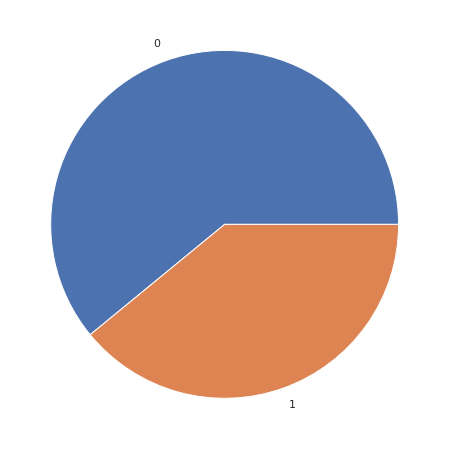

In [64]:
mapping_readmittance = {'NO':0, '>30': 1, '<30' : 1}
df_diabetes['readmitted_categoricals'] = df_diabetes['readmitted'].map(mapping_readmittance)  

plt.pie(x=df_diabetes['readmitted_categoricals'].value_counts(), labels=df_diabetes['readmitted_categoricals'].value_counts().index)
df_diabetes['readmitted'].value_counts()

In [66]:
# Removing Uknown/Invalid Gender from data in order 

df_diabetes=df_diabetes[df_diabetes['gender'] != 'Unkown/Invalid']

# Removing records with missing race

df_diabetes = df_diabetes[df_diabetes.race != '?']

In [67]:
# Converting age to numericals

def age_convert(st):
    if st=='[0-10)': return 5 
    age=int(st[1:3])
    age+=5
    return age

df_diabetes['age'] = df_diabetes['age'].apply(age_convert)

In [68]:
def admit_type_convert(x):
    if x==7:
        return 3
    if x==1:
        return 2
    if x==2:
        return 1
    if x==3:
        return 0
    else:
        return 1
df_diabetes['admission_type_id'] = df_diabetes['admission_type_id'].apply(admit_type_convert)

In [70]:
df_diabetes = df_diabetes.drop(['medical_specialty','weight', 'citoglipton','examide','admission_source_id'], axis=1)
df_diabetes = df_diabetes[df_diabetes.diag_1 != '?']

In [71]:

def classify_diagnostic(d):
    diagnostic = d 
    if 'V' in diagnostic or 'E' in diagnostic or diagnostic=='?' : return 'Other'
    diagnostic = int(float(d))
    if (diagnostic>=390 and diagnostic<460) or np.floor(diagnostic)==785: return 'Circulatory'
    if (diagnostic>=460 and diagnostic<520) or np.floor(diagnostic)==786: return 'Respiratory'
    if (diagnostic>=520 and diagnostic<580) or np.floor(diagnostic)==787: return 'Digestive'
    if (diagnostic>=580 and diagnostic<630) or np.floor(diagnostic)==788: return 'Genitourinary'
    if (diagnostic>=800 and diagnostic<1000) : return 'Injury'
    if (diagnostic>=701 and diagnostic<740) : return 'Musculoskeletal'
    if (diagnostic>=140 and diagnostic<240) : return 'Neoplasms'
    if np.floor(diagnostic)==250 : return 'Diabetes'
    else : return 'Other'


df_diabetes['diag_type'] = df_diabetes['diag_1'].apply(classify_diagnostic)


df_diabetes = df_diabetes.drop(['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone'], axis=1)

In [72]:
df_diabetes[['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone']]=df_diabetes[['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone']].where(lambda x : x=='No').fillna(1).replace({'No':0})


In [74]:

sub = df_diabetes[['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone', 'insurance_type']]

distro = (sub.groupby('insurance_type').sum()/sub.groupby('insurance_type').count()).mul(100)

distro.T.corr()

insurance_type,Private,Public,Self-Paid
insurance_type,,,
Private,1.000000,0.991669,0.996333
Public,0.991669,1.000000,0.993245
Self-Paid,0.996333,0.993245,1.000000


In [78]:
df_diabetes

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,payer_code,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,insurance_type,readmitted_categoricals,diag_type,readmitted_coded
20446,72091308,20123568,Caucasian,Female,75,2,22,7,MC,58,...,0,0,0,Ch,Yes,NO,Public,0,Injury,Not Readmitted
20737,72848634,20377854,Caucasian,Female,65,1,1,3,MC,59,...,0,0,0,No,Yes,NO,Public,0,Other,Not Readmitted
20824,73062156,20408121,Caucasian,Female,95,2,1,4,MC,56,...,0,0,0,No,Yes,NO,Public,0,Digestive,Not Readmitted
21083,73731852,20542797,Caucasian,Male,75,2,2,10,MC,68,...,0,0,0,Ch,Yes,NO,Public,0,Other,Not Readmitted
23668,80820942,20514150,Caucasian,Female,65,1,1,4,MC,33,...,0,0,0,Ch,Yes,<30,Public,1,Diabetes,Readmitted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,443835140,175326800,Caucasian,Male,75,0,6,13,MC,77,...,0,0,0,Ch,Yes,NO,Public,0,Circulatory,Not Readmitted
101752,443835512,139605341,Other,Female,45,0,1,3,HM,13,...,0,0,0,Ch,Yes,NO,Private,0,Other,Not Readmitted
101755,443842022,188574944,Other,Female,45,2,1,14,MD,73,...,0,0,0,Ch,Yes,>30,Public,1,Genitourinary,Readmitted
101756,443842070,140199494,Other,Female,65,2,1,2,MD,46,...,0,0,0,No,Yes,>30,Public,1,Injury,Readmitted


In [73]:
di = {'NO': 'Not Readmitted', '>30': 'Readmitted', '<30' : 'Readmitted'}

In [75]:
df_diabetes['readmitted_coded'] = df_diabetes['readmitted'].map(di)  

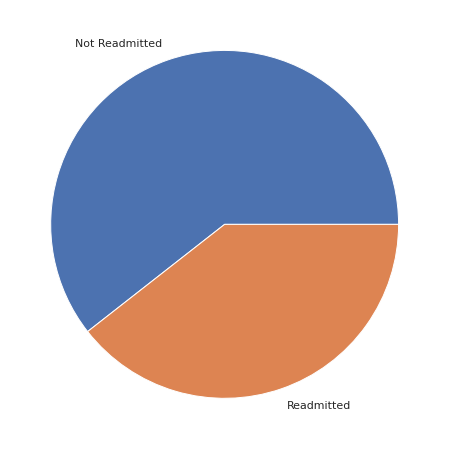

In [76]:
plt.pie(x=df_diabetes['readmitted_coded'].value_counts(), labels=df_diabetes['readmitted_coded'].value_counts().index)
df_diabetes['readmitted_coded'].value_counts()

In [42]:
def plot_readmissions(X_var):
    for type in ['Public', 'Private', 'Self-Paid']:
        fig = plt.figure(figsize=(13,7),)
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['readmitted_coded'] == 0) & (df_diabetes["insurance_type"] == type),X_var] , color='b',shade=True,label='Not Readmitted')
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['readmitted_coded'] == 1) & (df_diabetes["insurance_type"] == type),X_var] , color='r',shade=True, label='Readmitted >30 Days')
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes['readmitted_coded'] == 2) & (df_diabetes["insurance_type"] == type),X_var] , color='g',shade=True, label='Readmitted <30 Days')
        ax.set(xlabel= X_var, ylabel='Frequency')
        plt.legend(loc="upper right")
        plt.title(X_var + ' VS. Readmission | Insurance Type: ' + type)
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


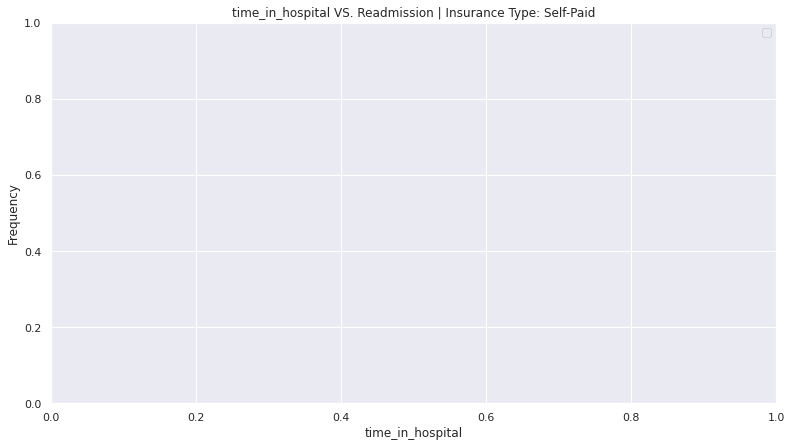

In [43]:
plot_readmissions('time_in_hospital')

In [515]:
def plot_readmissions_v2(X_var):

    for type in [0,1,2]:
        fig = plt.figure(figsize=(13,7),)
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes["insurance_type"] == 'Public') & (df_diabetes['readmitted_coded'] == type),X_var] , color='b',shade=True,label='Public')
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes["insurance_type"] == 'Private') & (df_diabetes['readmitted_coded'] == type),X_var] , color='r',shade=True, label='Private')
        ax=sns.kdeplot(df_diabetes.loc[(df_diabetes["insurance_type"] == 'Self-Paid') & (df_diabetes['readmitted_coded'] == type),X_var] , color='g',shade=True, label='Self-Paid')
        ax.set(xlabel= X_var, ylabel='Frequency')
        plt.legend(loc="upper right")
        plt.title(X_var + ' VS. Readmission | Readmission Type: ' + str(type))
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


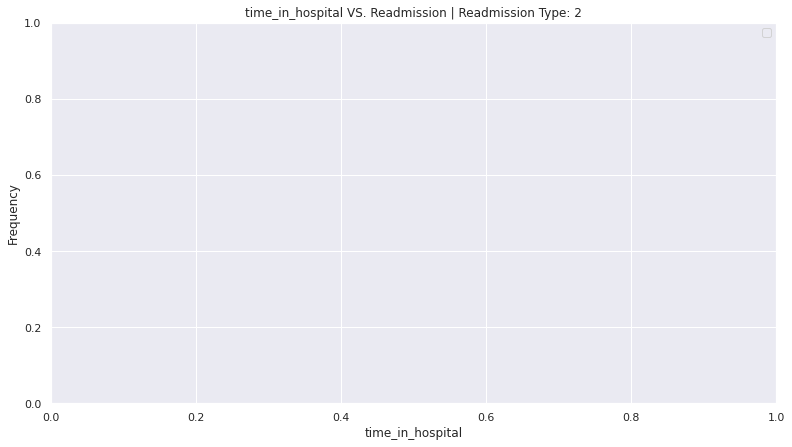

In [516]:
plot_readmissions_v2('time_in_hospital')

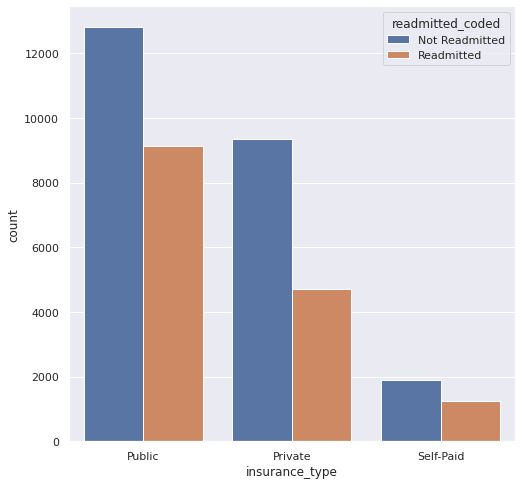

In [47]:
sns.countplot(x='insurance_type',hue='readmitted_coded',data= df_diabetes)

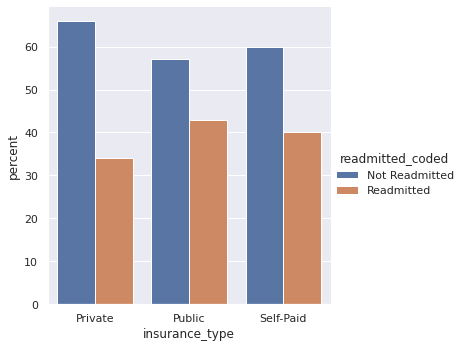

In [77]:
x,y = 'insurance_type', 'readmitted_coded'

(df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.rcParams['figure.figsize']=(10,10)
plt.savefig('readmit_by_type.png')

plt.show()

In [79]:
x,y = 'insurance_type', 'readmitted_coded'

(df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent'))

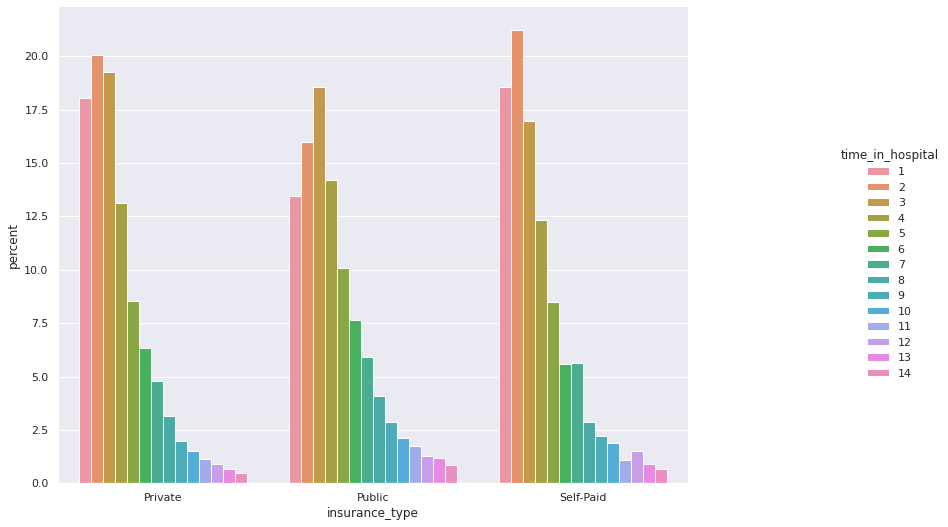

In [470]:
x,y = 'insurance_type', 'time_in_hospital'
g = (df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
# plt.savefig('readmit_by_type.png')
g.figure.set_figwidth(15)
g.figure.set_figheight(8)
plt.savefig('time_dist_by_insur.png')
plt.show()

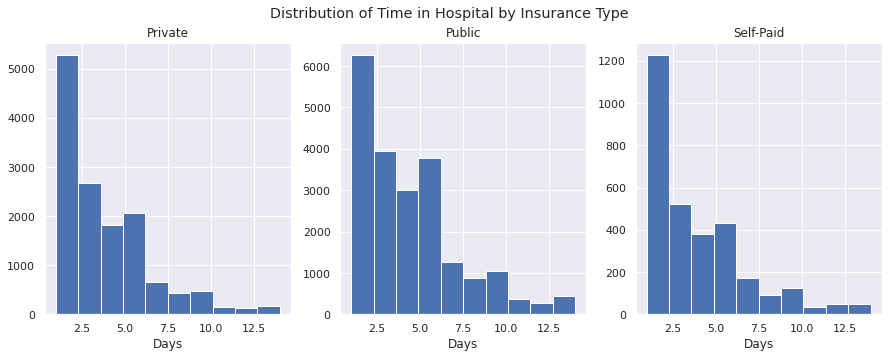

In [474]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Distribution of Time in Hospital by Insurance Type')
ax1.set_xlabel('Days')
ax2.set_xlabel('Days')
ax3.set_xlabel('Days')
ax1.set_title('Private')
ax2.set_title('Public')
ax3.set_title('Self-Paid')
df_diabetes[df_diabetes['insurance_type'] == 'Private']['time_in_hospital'].hist(ax = ax1)
df_diabetes[df_diabetes['insurance_type'] == 'Public']['time_in_hospital'].hist(ax = ax2)
df_diabetes[df_diabetes['insurance_type'] == 'Self-Paid']['time_in_hospital'].hist(ax = ax3)
plt.savefig('time_spent_dist.png')
plt.show()

In [176]:
x,y = 'insurance_type', 'time_in_hospital'
df_diabetes.groupby(x)[y].mean()

In [177]:
x,y = 'insurance_type', 'time_in_hospital'
df_diabetes.groupby(x)[y].std()

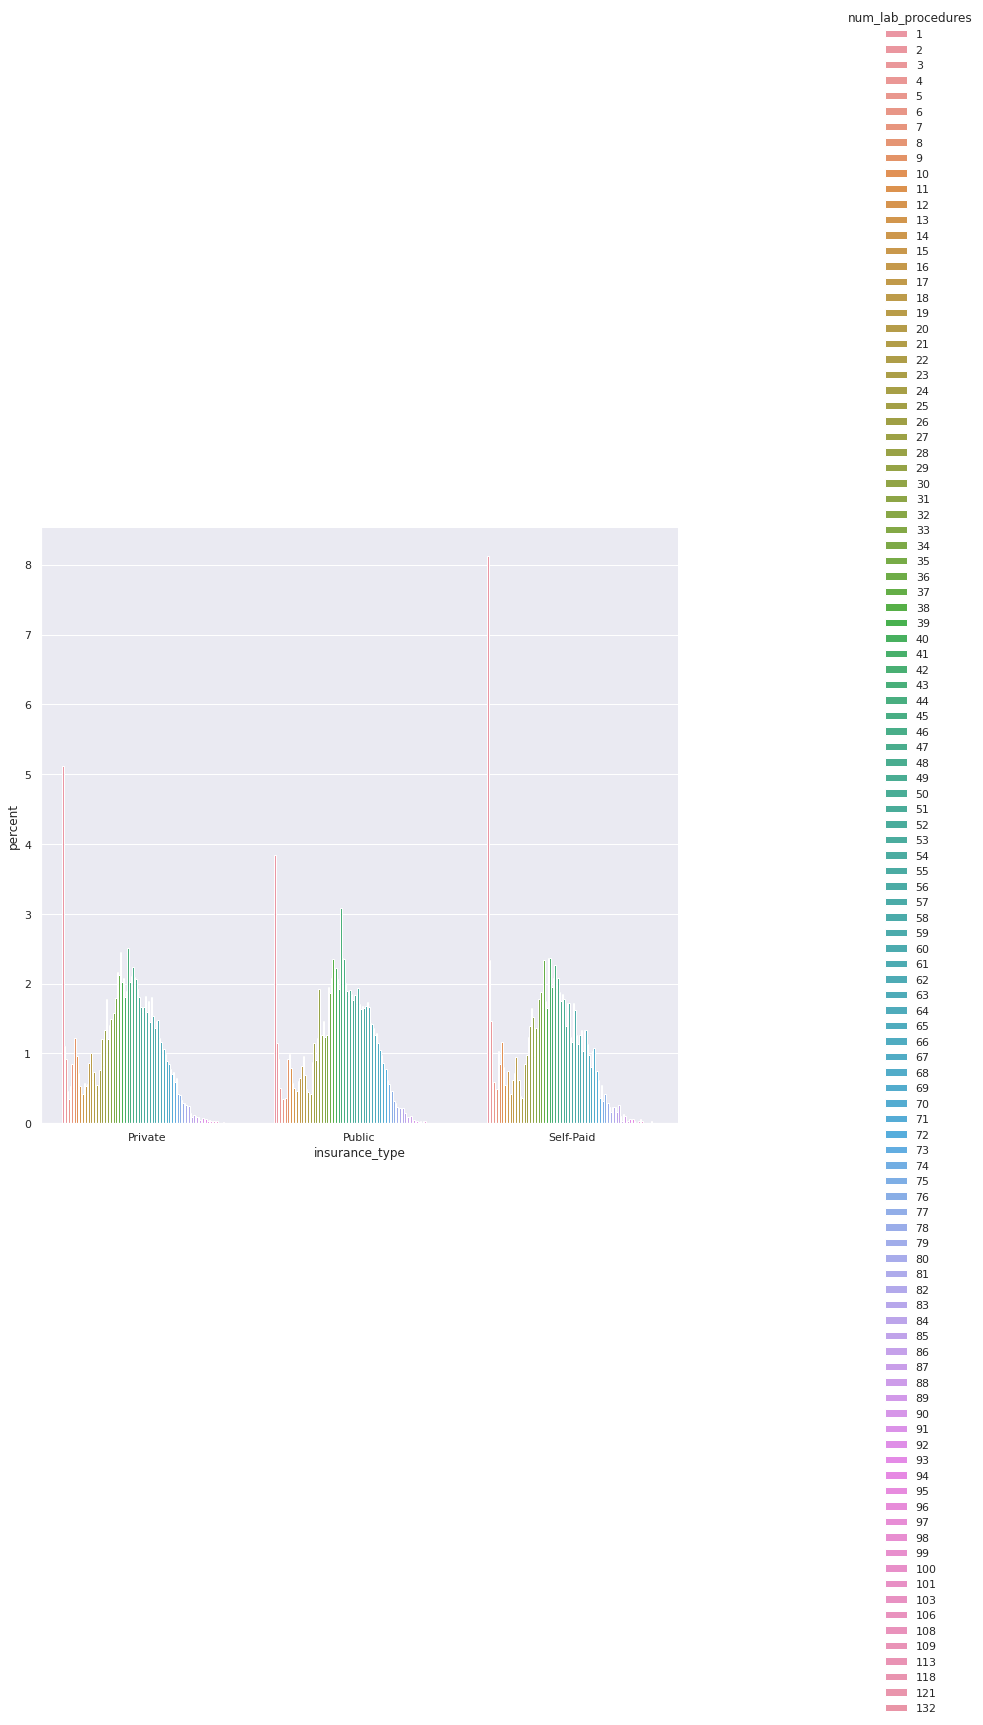

In [127]:
x,y = 'insurance_type', 'num_lab_procedures'
g = (df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
# plt.savefig('readmit_by_type.png')
g.figure.set_figwidth(15)
g.figure.set_figheight(10)
plt.show()

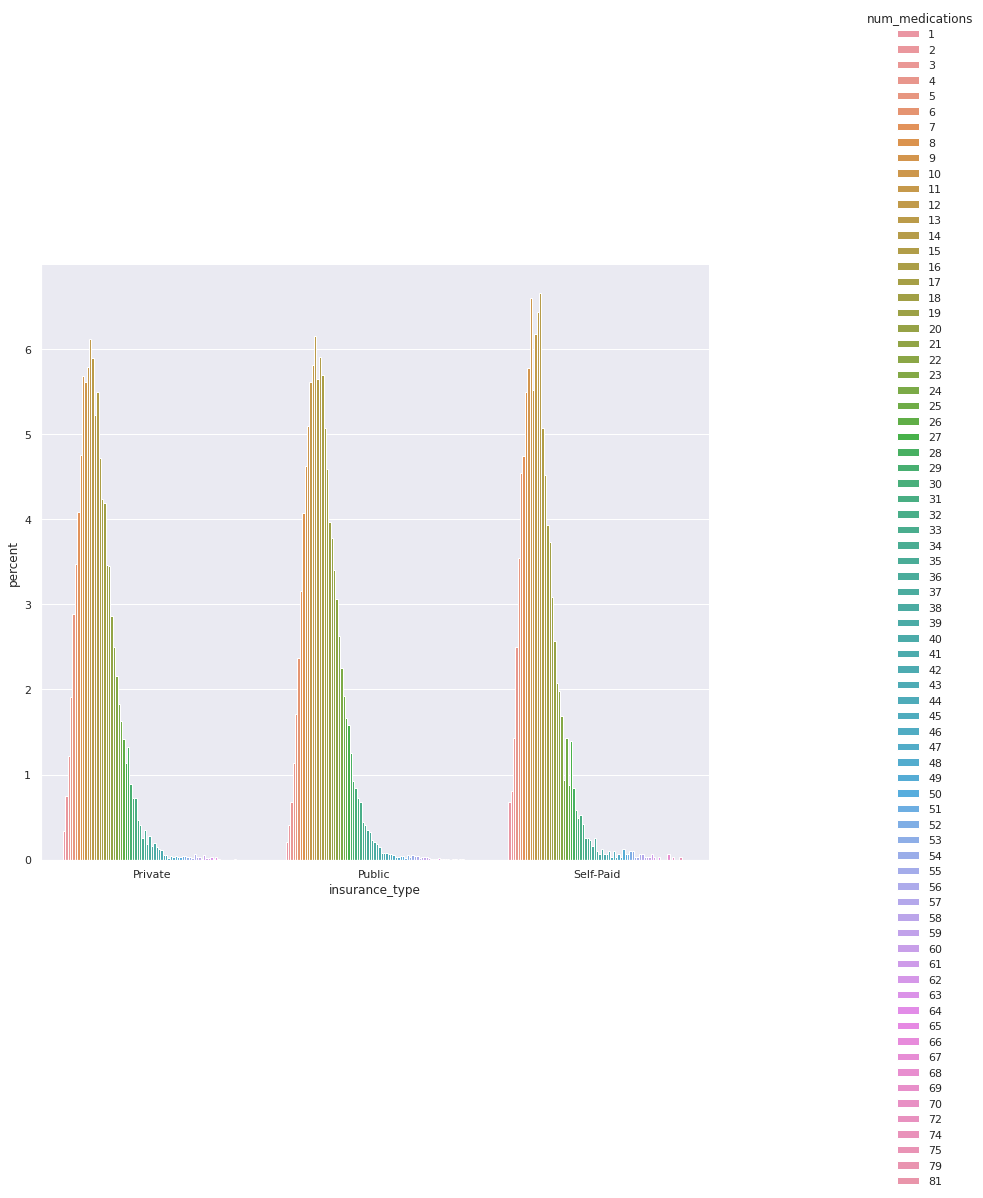

In [133]:
x,y = 'insurance_type', 'num_medications'
g = (df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
# plt.savefig('readmit_by_type.png')
g.figure.set_figwidth(15)
g.figure.set_figheight(10)
plt.show()

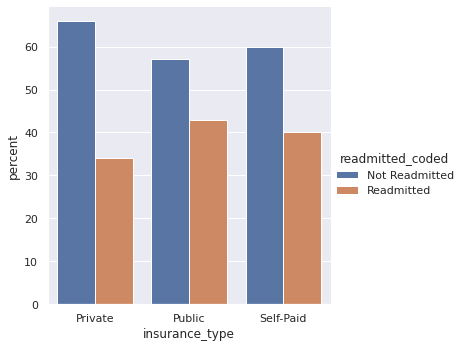

In [123]:
x,y = 'insurance_type', 'readmitted_coded'

(df_diabetes
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.rcParams['figure.figsize']=(10,10)
# plt.savefig('readmit_by_type.png')

plt.show()

In [85]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,payer_code,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,insurance_type,readmitted_categoricals,diag_type,readmitted_coded
20446,72091308,20123568,Caucasian,Female,75,2,22,7,MC,58,...,0,0,0,Ch,Yes,NO,Public,0,Injury,Not Readmitted
20737,72848634,20377854,Caucasian,Female,65,1,1,3,MC,59,...,0,0,0,No,Yes,NO,Public,0,Other,Not Readmitted
20824,73062156,20408121,Caucasian,Female,95,2,1,4,MC,56,...,0,0,0,No,Yes,NO,Public,0,Digestive,Not Readmitted
21083,73731852,20542797,Caucasian,Male,75,2,2,10,MC,68,...,0,0,0,Ch,Yes,NO,Public,0,Other,Not Readmitted
23668,80820942,20514150,Caucasian,Female,65,1,1,4,MC,33,...,0,0,0,Ch,Yes,<30,Public,1,Diabetes,Readmitted


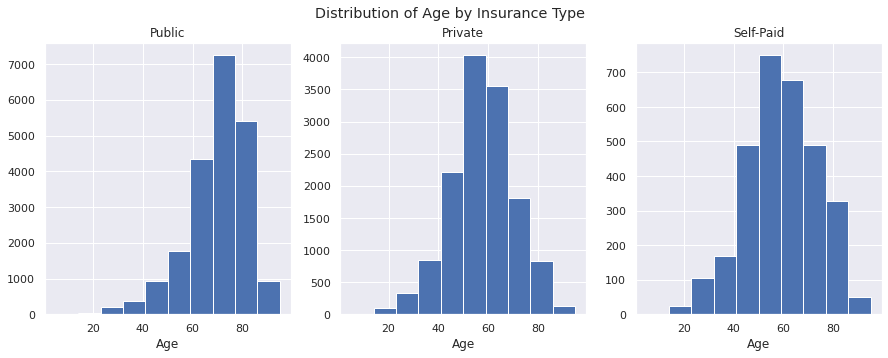

In [320]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Distribution of Age by Insurance Type')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_title('Public')
ax2.set_title('Private')
ax3.set_title('Self-Paid')
df_diabetes[df_diabetes['insurance_type'] == 'Public']['age'].hist(ax = ax1)
df_diabetes[df_diabetes['insurance_type'] == 'Private']['age'].hist(ax = ax2)
df_diabetes[df_diabetes['insurance_type'] == 'Self-Paid']['age'].hist(ax = ax3)
plt.savefig('age_dist.png')
plt.show()

In [272]:
x,y = 'insurance_type', 'age'
df_diabetes.groupby(x)[y].mean()

In [274]:
x,y = 'insurance_type', 'age'
df_diabetes.groupby(x)[y].std()

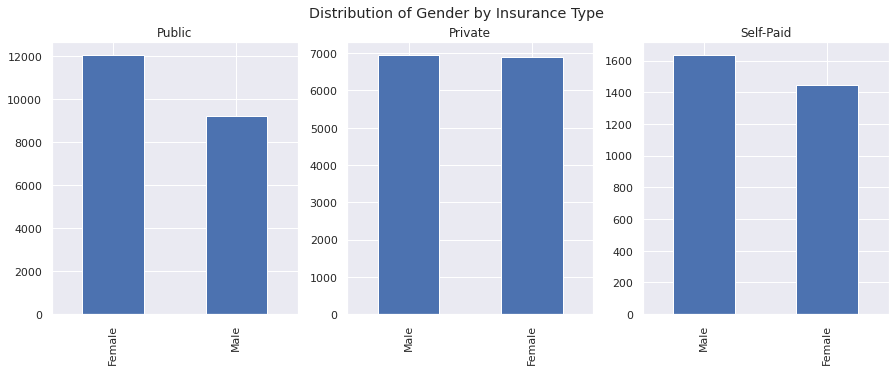

In [514]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Distribution of Gender by Insurance Type')
ax1.set_title('Public')
ax2.set_title('Private')
ax3.set_title('Self-Paid')
df_diabetes[df_diabetes['insurance_type'] == 'Public']['gender'].value_counts().plot(kind='bar', ax = ax1)
df_diabetes[df_diabetes['insurance_type'] == 'Private']['gender'].value_counts().plot(kind='bar', ax = ax2)
df_diabetes[df_diabetes['insurance_type'] == 'Self-Paid']['gender'].value_counts().plot(kind='bar', ax = ax3)
plt.savefig('gender_dist.png', bbox_inches="tight")
plt.show()

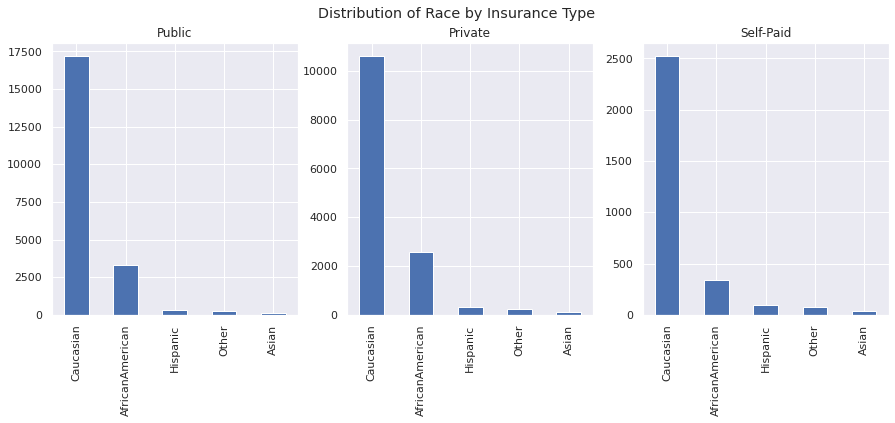

In [338]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Distribution of Race by Insurance Type')
ax1.set_title('Public')
ax2.set_title('Private')
ax3.set_title('Self-Paid')
df_diabetes[df_diabetes['insurance_type'] == 'Public']['race'].value_counts().plot(kind='bar', ax = ax1)
df_diabetes[df_diabetes['insurance_type'] == 'Private']['race'].value_counts().plot(kind='bar', ax = ax2)
df_diabetes[df_diabetes['insurance_type'] == 'Self-Paid']['race'].value_counts().plot(kind='bar', ax = ax3)
plt.savefig('race_dist.png')
plt.show()

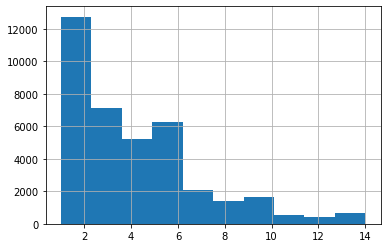

In [28]:
df_diabetes.time_in_hospital.hist()

In [29]:
test_res_df = df_diabetes[(df_diabetes['A1Cresult']!='None')]

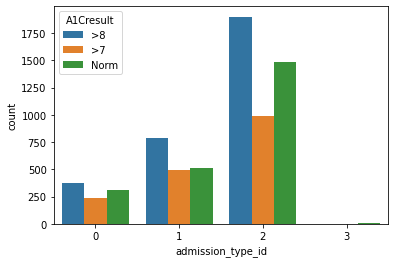

In [30]:
sns.countplot(x='admission_type_id',hue='A1Cresult',data= test_res_df)

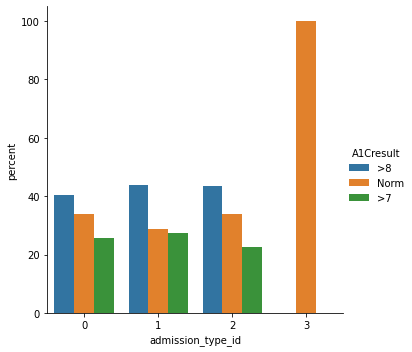

In [31]:
x,y = 'admission_type_id', 'A1Cresult'

(test_res_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

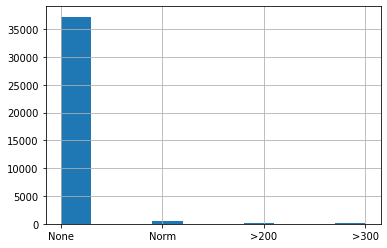

In [32]:
df_diabetes.max_glu_serum.hist()

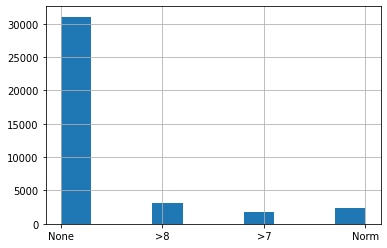

In [33]:
df_diabetes.A1Cresult.hist()

In [34]:
df_diabetes.groupby(['payer_code', 'metformin']).count()

KeyError: KeyError: 'metformin'

In [35]:

# Different treatments
corr_matrix= df_diabetes[['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone']].where(lambda x : x=='No').fillna(1).replace({'No':0}).corr()

sns.heatmap(corr_matrix.fillna(0))


KeyError: KeyError: "None of [Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',\n       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',\n       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',\n       'tolazamide', 'examide', 'citoglipton', 'insulin',\n       'glyburide-metformin', 'glipizide-metformin',\n       'glimepiride-pioglitazone', 'metformin-rosiglitazone',\n       'metformin-pioglitazone'],\n      dtype='object')] are in the [columns]"

In [36]:
df_diabetes.payer_code.value_counts()

In [37]:
from lets_plot import *
ggplot(df_diabetes['payer_code_trans']) + geom_bar(aes(x="payer_code_trans", y="payer_code_trans"), stat='identity')

KeyError: KeyError: 'payer_code_trans'

MC: Medicare

HM:Private 

SP: Private 

BC: Private 


In [0]:
df

# Modelling

In [442]:
df_scikit=df_diabetes.drop(columns=['encounter_id','patient_nbr','discharge_disposition_id','payer_code','diag_1','diag_2','diag_3'
,'max_glu_serum','A1Cresult','readmitted'])
df_scikit = df_scikit.drop(['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone'], axis=1)


y_readmit = df_diabetes['readmitted_categoricals']

In [443]:
#'df_scikit=pd.get_dummies(df_scikit,columns=['race','diag_type','insurance_type'])
df_scikit=pd.get_dummies(df_scikit,columns=['race','diag_type'],drop_first=True)

In [444]:
df_scikit=pd.get_dummies(df_scikit,columns=['gender','change','diabetesMed'],drop_first=True)

In [445]:
df_scikit['insurance_type'] = df_scikit['insurance_type'].apply(lambda x : 1 if x=='Private' else 0)

In [446]:
df_scikit.rename(columns={'admission_type_id':'admission_severity'},inplace=True)

In [447]:
cols_to_std=df_scikit.columns.tolist()[0:10]

In [448]:
cols_to_std

['age',
 'admission_severity',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [449]:
df_scikit[cols_to_std]=df_scikit[cols_to_std].sub(df_scikit[cols_to_std].mean(axis=0)).div(df_scikit[cols_to_std].std(axis=0))

In [450]:
df_scikit

,age,admission_severity,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diag_type_Digestive,diag_type_Genitourinary,diag_type_Injury,diag_type_Musculoskeletal,diag_type_Neoplasms,diag_type_Other,diag_type_Respiratory,gender_Male,change_No,diabetesMed_Yes
20446,0.561409,0.834168,1.015475,0.812075,0.382154,-0.083870,-0.291568,-0.216127,-0.258551,0.810931,...,0,0,1,0,0,0,0,0,0,1
20737,-0.076755,-0.395787,-0.398207,0.861208,0.962937,-0.578297,-0.291568,-0.216127,-0.258551,-0.740541,...,0,0,0,0,0,1,0,0,1,1
20824,1.837736,0.834168,-0.044787,0.713810,-0.198629,-0.825510,-0.291568,-0.216127,-0.258551,-0.740541,...,1,0,0,0,0,0,0,0,1,1
21083,0.561409,0.834168,2.075737,1.303401,-0.198629,0.286950,-0.291568,-0.216127,-0.258551,-0.740541,...,0,0,0,0,0,1,0,1,0,1
23668,-0.076755,-0.395787,-0.044787,-0.416240,-0.779412,-0.578297,-0.291568,-0.216127,-0.258551,-1.774856,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,0.561409,-1.625742,3.135998,1.745594,2.705286,6.096465,-0.291568,-0.216127,-0.258551,4.431033,...,0,0,0,0,0,0,0,1,0,1
101752,-1.353082,-1.625742,-0.398207,-1.398892,-0.198629,-1.319937,-0.291568,-0.216127,-0.258551,0.293774,...,0,0,0,0,0,1,0,0,0,1
101755,-1.353082,0.834168,3.489419,1.549064,2.705286,1.275803,-0.291568,1.438704,-0.258551,0.810931,...,0,1,0,0,0,0,0,0,0,1
101756,-0.076755,0.834168,-0.751628,0.222484,2.705286,0.163343,0.536712,1.438704,1.733510,0.810931,...,0,0,1,0,0,0,0,0,1,1


In [451]:
X=df_scikit.drop(columns=['readmitted_categoricals','readmitted_coded'])

In [452]:
import statsmodels.api as sm
log_reg = sm.Logit(y_readmit, X.astype('float64')).fit(method='minimize')

         Current function value: 0.648168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/python/envs/default/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [489]:
np.abs(log_reg.params[10])

0.27046907506906104

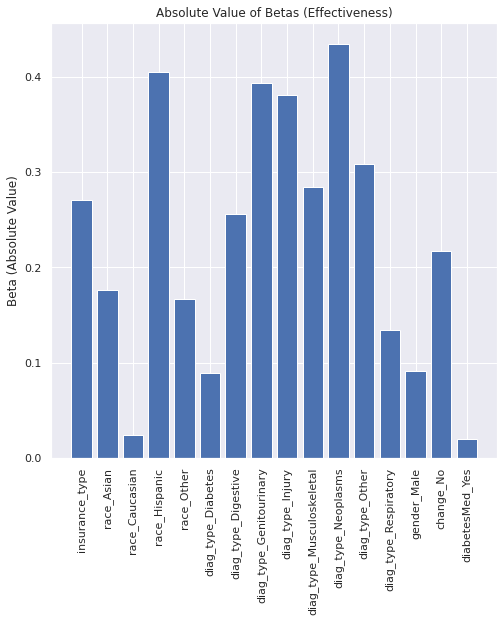

In [509]:
plt.bar(X.columns[10:],np.abs(log_reg.params[10:]))
plt.xticks(rotation=90)
plt.ylabel('Beta (Absolute Value)')
plt.title('Absolute Value of Betas (Effectiveness)')

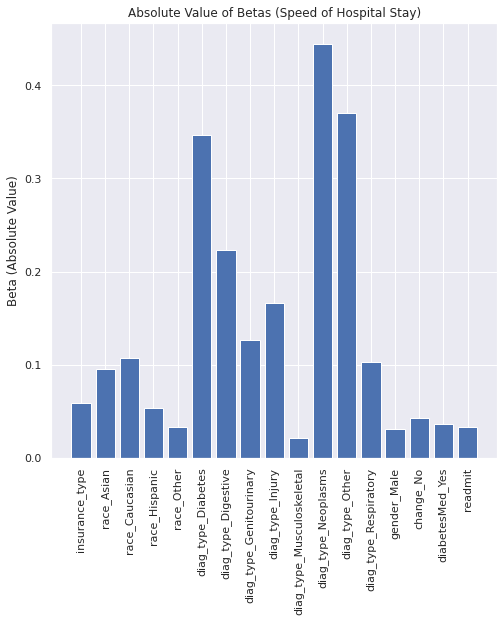

In [510]:
plt.bar(X_2.columns[9:],np.abs(ols_reg.params[9:]))
plt.xticks(rotation=90)
plt.ylabel('Beta (Absolute Value)')

plt.title('Absolute Value of Betas (Speed of Hospital Stay)')

In [453]:
log_reg.summary()


Logit Regression Results 
 
 Dep. Variable: readmitted_categoricals No. Observations: 38146 
 
 
 Model: Logit Df Residuals: 38120 
 
 
 Method: MLE Df Model: 25 
 
 
 Date: Sat, 09 Apr 2022 Pseudo R-squ.: 0.03351 
 
 
 Time: 20:43:39 Log-Likelihood: -24725. 
 
 
 converged: False LL-Null: -25582. 
 
 
 Covariance Type: nonrobust LLR p-value: 0.000 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 age 0.0919 0.013 7.344 0.000 0.067 0.116 
 
 
 admission_severity 0.0178 0.012 1.476 0.140 -0.006 0.041 
 
 
 time_in_hospital 0.0628 0.013 4.895 0.000 0.038 0.088 
 
 
 num_lab_procedures 0.0050 0.012 0.406 0.685 -0.019 0.029 
 
 
 num_procedures -0.0388 0.012 -3.117 0.002 -0.063 -0.014 
 
 
 num_medications -0.0207 0.014 -1.449 0.147 -0.049 0.007 
 
 
 number_outpatient 0.1050 0.012 8.980 0.000 0.082 0.128 
 
 
 number_emergency 0.1735 0.014 12.163 0.000 0.146 0.201 
 
 
 number_inpatient 0.1979 0.012 15.978 0.000 0.174 0.222 
 
 
 number_diagnoses 0.1727 0.012 14.387 0.000 0.149 0.196 
 
 
 insurance_type -0.2705 0.024 -11.253 0.000 -0.318 -0.223 
 
 
 race_Asian -0.1760 0.138 -1.276 0.202 -0.446 0.094 
 
 
 race_Caucasian 0.0237 0.026 0.908 0.364 -0.027 0.075 
 
 
 race_Hispanic -0.4046 0.087 -4.663 0.000 -0.575 -0.235 
 
 
 race_Other -0.1667 0.092 -1.821 0.069 -0.346 0.013 
 
 
 diag_type_Diabetes -0.0893 0.044 -2.025 0.043 -0.176 -0.003 
 
 
 diag_type_Digestive -0.2562 0.039 -6.504 0.000 -0.333 -0.179 
 
 
 diag_type_Genitourinary -0.3935 0.050 -7.838 0.000 -0.492 -0.295 
 
 
 diag_type_Injury -0.3806 0.045 -8.522 0.000 -0.468 -0.293 
 
 
 diag_type_Musculoskeletal -0.2838 0.049 -5.769 0.000 -0.380 -0.187 
 
 
 diag_type_Neoplasms -0.4348 0.062 -7.067 0.000 -0.555 -0.314 
 
 
 diag_type_Other -0.3088 0.033 -9.346 0.000 -0.374 -0.244 
 
 
 diag_type_Respiratory -0.1341 0.035 -3.866 0.000 -0.202 -0.066 
 
 
 gender_Male -0.0916 0.021 -4.285 0.000 -0.134 -0.050 
 
 
 change_No -0.2172 0.022 -9.860 0.000 -0.260 -0.174 
 
 
 diabetesMed_Yes 0.0200 0.023 0.855 0.392 -0.026 0.066

In [469]:
X.dtypes.to_csv('dtypes.csv')

In [455]:
y_time=X['time_in_hospital']

In [456]:
X_2=X.drop(columns=['time_in_hospital'])

In [457]:
X_2['readmit']=y_readmit

In [458]:
X_2

,age,admission_severity,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insurance_type,...,diag_type_Genitourinary,diag_type_Injury,diag_type_Musculoskeletal,diag_type_Neoplasms,diag_type_Other,diag_type_Respiratory,gender_Male,change_No,diabetesMed_Yes,readmit
20446,0.561409,0.834168,0.812075,0.382154,-0.083870,-0.291568,-0.216127,-0.258551,0.810931,0,...,0,1,0,0,0,0,0,0,1,0
20737,-0.076755,-0.395787,0.861208,0.962937,-0.578297,-0.291568,-0.216127,-0.258551,-0.740541,0,...,0,0,0,0,1,0,0,1,1,0
20824,1.837736,0.834168,0.713810,-0.198629,-0.825510,-0.291568,-0.216127,-0.258551,-0.740541,0,...,0,0,0,0,0,0,0,1,1,0
21083,0.561409,0.834168,1.303401,-0.198629,0.286950,-0.291568,-0.216127,-0.258551,-0.740541,0,...,0,0,0,0,1,0,1,0,1,0
23668,-0.076755,-0.395787,-0.416240,-0.779412,-0.578297,-0.291568,-0.216127,-0.258551,-1.774856,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,0.561409,-1.625742,1.745594,2.705286,6.096465,-0.291568,-0.216127,-0.258551,4.431033,0,...,0,0,0,0,0,0,1,0,1,0
101752,-1.353082,-1.625742,-1.398892,-0.198629,-1.319937,-0.291568,-0.216127,-0.258551,0.293774,1,...,0,0,0,0,1,0,0,0,1,0
101755,-1.353082,0.834168,1.549064,2.705286,1.275803,-0.291568,1.438704,-0.258551,0.810931,0,...,1,0,0,0,0,0,0,0,1,1
101756,-0.076755,0.834168,0.222484,2.705286,0.163343,0.536712,1.438704,1.733510,0.810931,0,...,0,1,0,0,0,0,0,1,1,1


In [502]:
ols_reg=sm.OLS(y_time,X_2).fit()

In [512]:
ols_reg.summary()

OLS Regression Results 
 
 Dep. Variable: time_in_hospital R-squared (uncentered): 0.316 
 
 
 Model: OLS Adj. R-squared (uncentered): 0.316 
 
 
 Method: Least Squares F-statistic: 677.8 
 
 
 Date: Sat, 09 Apr 2022 Prob (F-statistic): 0.00 
 
 
 Time: 21:52:27 Log-Likelihood: -46878. 
 
 
 No. Observations: 38146 AIC: 9.381e+04 
 
 
 Df Residuals: 38120 BIC: 9.403e+04 
 
 
 Df Model: 26 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 age 0.0950 0.005 19.444 0.000 0.085 0.105 
 
 
 admission_severity 0.0182 0.005 3.825 0.000 0.009 0.028 
 
 
 num_lab_procedures 0.2061 0.005 43.661 0.000 0.197 0.215 
 
 
 num_procedures 0.0436 0.005 8.858 0.000 0.034 0.053 
 
 
 num_medications 0.3993 0.005 75.752 0.000 0.389 0.410 
 
 
 number_outpatient -0.0331 0.004 -7.756 0.000 -0.042 -0.025 
 
 
 number_emergency -0.0131 0.004 -3.031 0.002 -0.022 -0.005 
 
 
 number_inpatient 0.0190 0.004 4.392 0.000 0.011 0.027 
 
 
 number_diagnoses 0.0746 0.005 16.059 0.000 0.066 0.084 
 
 
 insurance_type -0.0593 0.009 -6.305 0.000 -0.078 -0.041 
 
 
 race_Asian -0.0956 0.053 -1.811 0.070 -0.199 0.008 
 
 
 race_Caucasian -0.1077 0.010 -10.411 0.000 -0.128 -0.087 
 
 
 race_Hispanic -0.0540 0.032 -1.689 0.091 -0.117 0.009 
 
 
 race_Other -0.0335 0.035 -0.949 0.343 -0.103 0.036 
 
 
 diag_type_Diabetes 0.3462 0.017 19.851 0.000 0.312 0.380 
 
 
 diag_type_Digestive 0.2232 0.016 14.399 0.000 0.193 0.254 
 
 
 diag_type_Genitourinary 0.1265 0.020 6.451 0.000 0.088 0.165 
 
 
 diag_type_Injury 0.1664 0.018 9.495 0.000 0.132 0.201 
 
 
 diag_type_Musculoskeletal 0.0214 0.019 1.111 0.267 -0.016 0.059 
 
 
 diag_type_Neoplasms 0.4448 0.024 18.903 0.000 0.399 0.491 
 
 
 diag_type_Other 0.3703 0.013 28.655 0.000 0.345 0.396 
 
 
 diag_type_Respiratory 0.1026 0.014 7.396 0.000 0.075 0.130 
 
 
 gender_Male -0.0306 0.008 -3.625 0.000 -0.047 -0.014 
 
 
 change_No -0.0427 0.009 -4.879 0.000 -0.060 -0.026 
 
 
 diabetesMed_Yes -0.0366 0.009 -3.899 0.000 -0.055 -0.018 
 
 
 readmit 0.0334 0.009 3.828 0.000 0.016 0.051 
 
 
 
 
 Omnibus: 6791.839 Durbin-Watson: 1.910 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 12784.338 
 
 
 Skew: 1.109 Prob(JB): 0.00 
 
 
 Kurtosis: 4.766 Cond. No. 18.7 
 
 Notes: [1] R² is computed without centering (uncentered) since the model does not contain a constant. [2] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [475]:
X_2.dtypes.to_csv('dtypes2.csv')

In [513]:
ols_reg.pvalues